In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [3]:
df= pd.read_csv("C:\\Users\\LENOVO\Desktop\\Python course\\911.csv")

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99492 entries, 0 to 99491
Data columns (total 9 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   lat        99492 non-null  float64
 1   lng        99492 non-null  float64
 2   desc       99492 non-null  object 
 3   zip        86637 non-null  float64
 4   title      99492 non-null  object 
 5   timeStamp  99492 non-null  object 
 6   twp        99449 non-null  object 
 7   addr       98973 non-null  object 
 8   e          99492 non-null  int64  
dtypes: float64(3), int64(1), object(5)
memory usage: 6.8+ MB


In [5]:
df.head()

,lat,lng,desc,zip,title,timeStamp,twp,addr,e
0,40.297876,-75.581294,REINDEER CT & DEAD END; NEW HANOVER; Station ...,19525.0,EMS: BACK PAINS/INJURY,12/10/2015 17:40,NEW HANOVER,REINDEER CT & DEAD END,1
1,40.258061,-75.264680,BRIAR PATH & WHITEMARSH LN; HATFIELD TOWNSHIP...,19446.0,EMS: DIABETIC EMERGENCY,12/10/2015 17:40,HATFIELD TOWNSHIP,BRIAR PATH & WHITEMARSH LN,1
2,40.121182,-75.351975,HAWS AVE; NORRISTOWN; 2015-12-10 @ 14:39:21-St...,19401.0,Fire: GAS-ODOR/LEAK,12/10/2015 17:40,NORRISTOWN,HAWS AVE,1
3,40.116153,-75.343513,AIRY ST & SWEDE ST; NORRISTOWN; Station 308A;...,19401.0,EMS: CARDIAC EMERGENCY,12/10/2015 17:40,NORRISTOWN,AIRY ST & SWEDE ST,1
4,40.251492,-75.603350,CHERRYWOOD CT & DEAD END; LOWER POTTSGROVE; S...,NaN,EMS: DIZZINESS,12/10/2015 17:40,LOWER POTTSGROVE,CHERRYWOOD CT & DEAD END,1


In [7]:
#Top five zip codes for 911 call

df['zip'].value_counts().head()

19401.0    6979
19464.0    6643
19403.0    4854
19446.0    4748
19406.0    3174
Name: zip, dtype: int64

In [9]:
#Top five townships for 911 calls

df['twp'].value_counts().head()

LOWER MERION    8443
ABINGTON        5977
NORRISTOWN      5890
UPPER MERION    5227
CHELTENHAM      4575
Name: twp, dtype: int64

In [11]:
#To find the unique title codes

df['title'].nunique()

110

In [17]:
df['Reason']= df['title'].apply(lambda title: title.split(':')[0])
df.head()

,lat,lng,desc,zip,title,timeStamp,twp,addr,e,Reason
0,40.297876,-75.581294,REINDEER CT & DEAD END; NEW HANOVER; Station ...,19525.0,EMS: BACK PAINS/INJURY,12/10/2015 17:40,NEW HANOVER,REINDEER CT & DEAD END,1,EMS
1,40.258061,-75.264680,BRIAR PATH & WHITEMARSH LN; HATFIELD TOWNSHIP...,19446.0,EMS: DIABETIC EMERGENCY,12/10/2015 17:40,HATFIELD TOWNSHIP,BRIAR PATH & WHITEMARSH LN,1,EMS
2,40.121182,-75.351975,HAWS AVE; NORRISTOWN; 2015-12-10 @ 14:39:21-St...,19401.0,Fire: GAS-ODOR/LEAK,12/10/2015 17:40,NORRISTOWN,HAWS AVE,1,Fire
3,40.116153,-75.343513,AIRY ST & SWEDE ST; NORRISTOWN; Station 308A;...,19401.0,EMS: CARDIAC EMERGENCY,12/10/2015 17:40,NORRISTOWN,AIRY ST & SWEDE ST,1,EMS
4,40.251492,-75.603350,CHERRYWOOD CT & DEAD END; LOWER POTTSGROVE; S...,NaN,EMS: DIZZINESS,12/10/2015 17:40,LOWER POTTSGROVE,CHERRYWOOD CT & DEAD END,1,EMS


In [18]:
df['Reason'].value_counts()

EMS        48877
Traffic    35695
Fire       14920
Name: Reason, dtype: int64

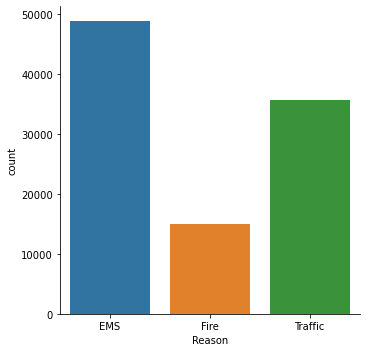

In [19]:
sns.catplot(x= 'Reason', data= df, kind= 'count')

In [20]:
type(df['timeStamp'].iloc[0])

str

In [23]:
df['timeStamp']= pd.to_datetime(df['timeStamp'])
df['timeStamp']

0       2015-12-10 17:40:00
1       2015-12-10 17:40:00
2       2015-12-10 17:40:00
3       2015-12-10 17:40:00
4       2015-12-10 17:40:00
                ...        
99487   2016-08-24 11:06:00
99488   2016-08-24 11:07:00
99489   2016-08-24 11:12:00
99490   2016-08-24 11:17:00
99491   2016-08-24 11:17:00
Name: timeStamp, Length: 99492, dtype: datetime64[ns]

In [27]:
time= df['timeStamp'].iloc[0]
time

Timestamp('2015-12-10 17:40:00')

In [29]:
df['Hour']= df['timeStamp'].apply (lambda x: x.hour)
df['Hour'].value_counts()

17    6517
16    6490
15    6154
12    6029
14    5997
13    5967
18    5762
11    5543
10    5413
9     5314
8     5044
19    4908
20    4377
7     3970
21    3788
22    3283
23    2559
6     2513
0     2112
1     1721
5     1629
2     1549
3     1435
4     1418
Name: Hour, dtype: int64

In [30]:
df['Month']= df['timeStamp'].apply (lambda x: x.month)
df['Month'].value_counts()

1     13205
7     12137
6     11786
2     11467
5     11423
4     11326
3     11101
8      9078
12     7969
Name: Month, dtype: int64

In [31]:
df['DayOfWeek']= df['timeStamp'].apply (lambda time: time.dayofweek)
df['DayOfWeek'].value_counts()

1    15150
2    14879
4    14833
0    14680
3    14478
5    13336
6    12136
Name: DayOfWeek, dtype: int64

In [ ]:
dmap= {0:'Mon', 1:'Tue', 2:'Wed', 3:'Thur', 4:'Fri', 5:'Sat', 6:'Sun'}

In [32]:
df['DayOfWeek']= df['timeStamp'].apply (lambda time: time.dayofweek)
dmap= {0:'Mon', 1:'Tue', 2:'Wed', 3:'Thur', 4:'Fri', 5:'Sat', 6:'Sun'}
df['DayOfWeek']= df['DayOfWeek'].map(dmap)


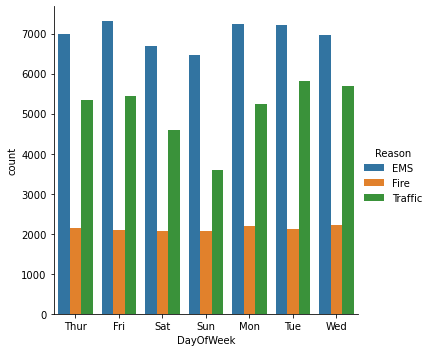

In [33]:
sns.catplot(x= 'DayOfWeek', kind= 'count', data= df, hue='Reason')

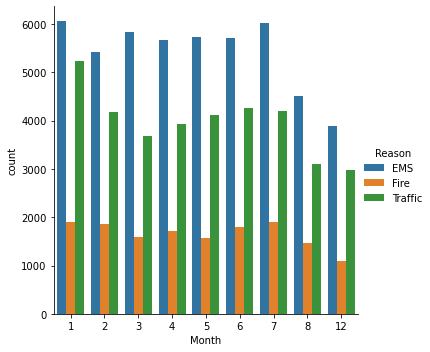

In [34]:
sns.catplot(x= 'Month', kind= 'count', data= df, hue='Reason')

In [37]:
df1= df.groupby('Month').count()
df1.head()

,lat,lng,desc,zip,title,timeStamp,twp,addr,e,Reason,Hour,DayOfWeek
Month,,,,,,,,,,,,
1,13205,13205,13205,11527,13205,13205,13203,13096,13205,13205,13205,13205
2,11467,11467,11467,9930,11467,11467,11465,11396,11467,11467,11467,11467
3,11101,11101,11101,9755,11101,11101,11092,11059,11101,11101,11101,11101
4,11326,11326,11326,9895,11326,11326,11323,11283,11326,11326,11326,11326
5,11423,11423,11423,9946,11423,11423,11420,11378,11423,11423,11423,11423


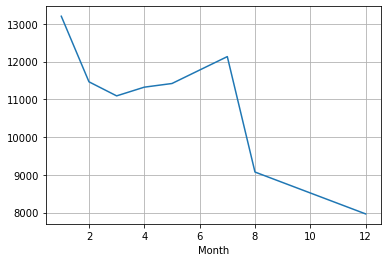

In [38]:
df1['twp'].plot(grid= True)

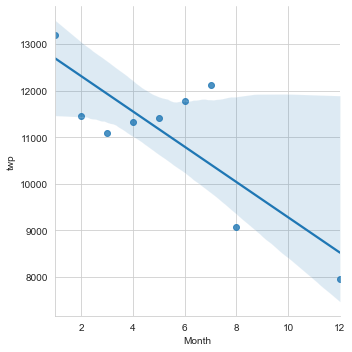

In [39]:
%matplotlib inline
sns.set_style('whitegrid')
sns.lmplot(x='Month', y='twp', data=df1.reset_index())
plt.tight_layout()

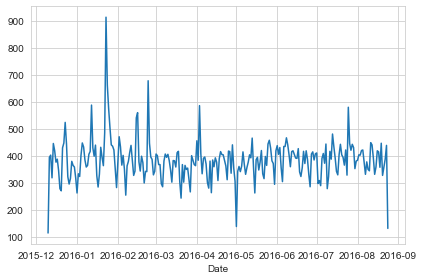

In [42]:
#Creating a new column date
df['Date']= df['timeStamp'].apply(lambda t: t.date())
df2= df.groupby('Date')
df2.count()['twp'].plot()
plt.tight_layout()

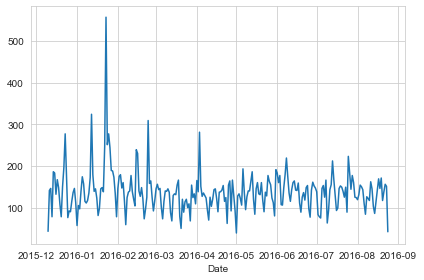

In [44]:
df[df['Reason']== 'Traffic'].groupby('Date').count()['twp'].plot()
plt.title= 'Traffic'
plt.tight_layout()

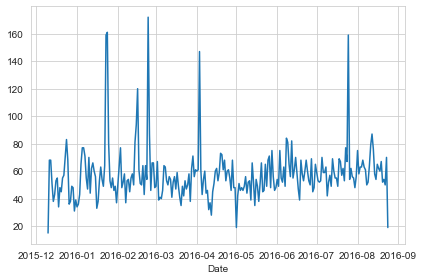

In [45]:
df[df['Reason']== 'Fire'].groupby('Date').count()['twp'].plot()
plt.title= 'Fire'
plt.tight_layout()

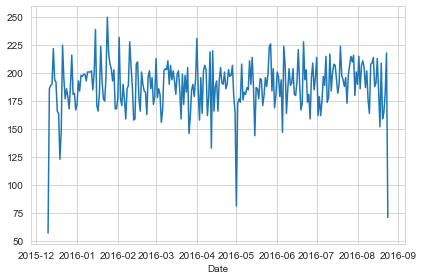

In [46]:
df[df['Reason']== 'EMS'].groupby('Date').count()['twp'].plot()
plt.title= 'EMS'
plt.tight_layout()

In [54]:
df.head()

,lat,lng,desc,zip,title,timeStamp,twp,addr,e,Reason,Hour,Month,DayOfWeek,Date
0,40.297876,-75.581294,REINDEER CT & DEAD END; NEW HANOVER; Station ...,19525.0,EMS: BACK PAINS/INJURY,2015-12-10 17:40:00,NEW HANOVER,REINDEER CT & DEAD END,1,EMS,17,12,Thur,2015-12-10
1,40.258061,-75.264680,BRIAR PATH & WHITEMARSH LN; HATFIELD TOWNSHIP...,19446.0,EMS: DIABETIC EMERGENCY,2015-12-10 17:40:00,HATFIELD TOWNSHIP,BRIAR PATH & WHITEMARSH LN,1,EMS,17,12,Thur,2015-12-10
2,40.121182,-75.351975,HAWS AVE; NORRISTOWN; 2015-12-10 @ 14:39:21-St...,19401.0,Fire: GAS-ODOR/LEAK,2015-12-10 17:40:00,NORRISTOWN,HAWS AVE,1,Fire,17,12,Thur,2015-12-10
3,40.116153,-75.343513,AIRY ST & SWEDE ST; NORRISTOWN; Station 308A;...,19401.0,EMS: CARDIAC EMERGENCY,2015-12-10 17:40:00,NORRISTOWN,AIRY ST & SWEDE ST,1,EMS,17,12,Thur,2015-12-10
4,40.251492,-75.603350,CHERRYWOOD CT & DEAD END; LOWER POTTSGROVE; S...,NaN,EMS: DIZZINESS,2015-12-10 17:40:00,LOWER POTTSGROVE,CHERRYWOOD CT & DEAD END,1,EMS,17,12,Thur,2015-12-10


In [55]:
dayHour= df.groupby(by=['DayOfWeek', 'Hour']).count()['Reason'].unstack()

dayHour

Hour,0,1,2,3,4,5,6,7,8,9,...,14,15,16,17,18,19,20,21,22,23
DayOfWeek,,,,,,,,,,,,,,,,,,,,,
Fri,275,235,191,175,201,194,372,598,742,752,...,932,980,1039,980,820,696,667,559,514,474
Mon,282,221,201,194,204,267,397,653,819,786,...,869,913,989,997,885,746,613,497,472,325
Sat,375,301,263,260,224,231,257,391,459,640,...,789,796,848,757,778,696,628,572,506,467
Sun,383,306,286,268,242,240,300,402,483,620,...,684,691,663,714,670,655,537,461,415,330
Thur,278,202,233,159,182,203,362,570,777,828,...,876,969,935,1013,810,698,617,553,424,354
Tue,269,240,186,170,209,239,415,655,889,880,...,943,938,1026,1019,905,731,647,571,462,274
Wed,250,216,189,209,156,255,410,701,875,808,...,904,867,990,1037,894,686,668,575,490,335


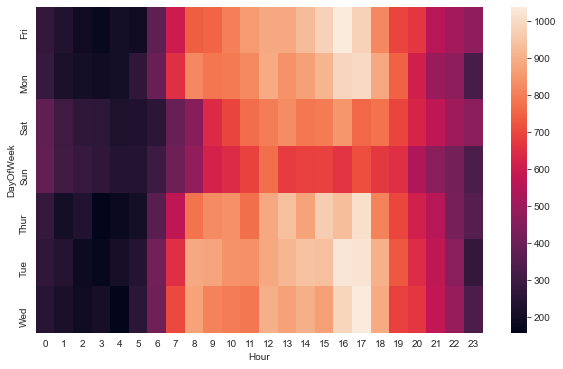

In [59]:
plt.figure(figsize=(10,6))
sns.heatmap(dayHour)


<Figure size 720x432 with 0 Axes>

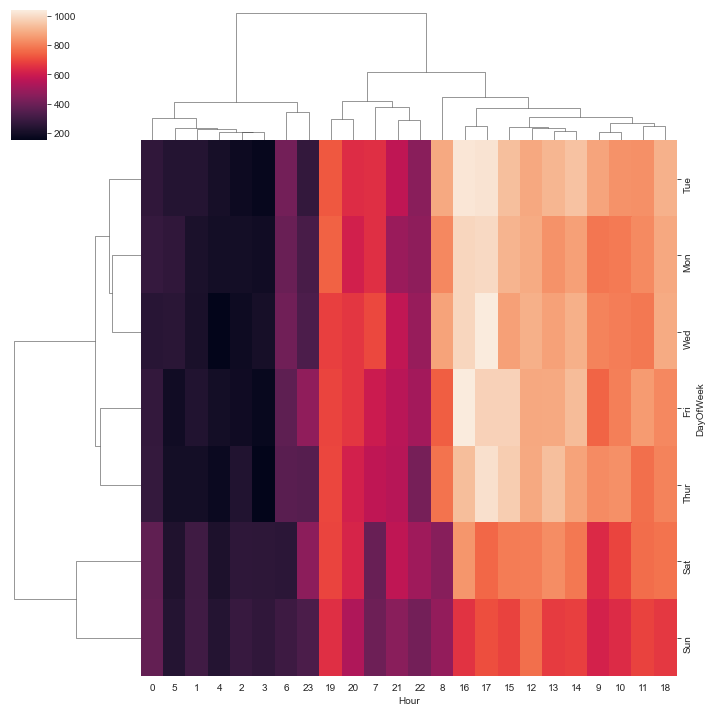

In [70]:
plt.figure(figsize=(10,6))
sns.clustermap(dayHour)

In [61]:
dayMonth= df.groupby(by=['DayOfWeek', 'Month']).count()['Reason'].unstack()

dayMonth

Month,1,2,3,4,5,6,7,8,12
DayOfWeek,,,,,,,,,
Fri,1970,1581,1525,1958,1730,1649,2045,1310,1065
Mon,1727,1964,1535,1598,1779,1617,1692,1511,1257
Sat,2291,1441,1266,1734,1444,1388,1695,1099,978
Sun,1960,1229,1102,1488,1424,1333,1672,1021,907
Thur,1584,1596,1900,1601,1590,2065,1646,1230,1266
Tue,1973,1753,1884,1430,1918,1676,1670,1612,1234
Wed,1700,1903,1889,1517,1538,2058,1717,1295,1262


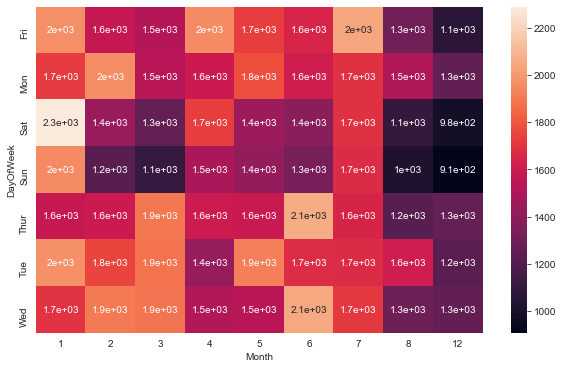

In [67]:
plt.figure(figsize=(10,6))
sns.heatmap(dayMonth, annot=True)


<Figure size 720x432 with 0 Axes>

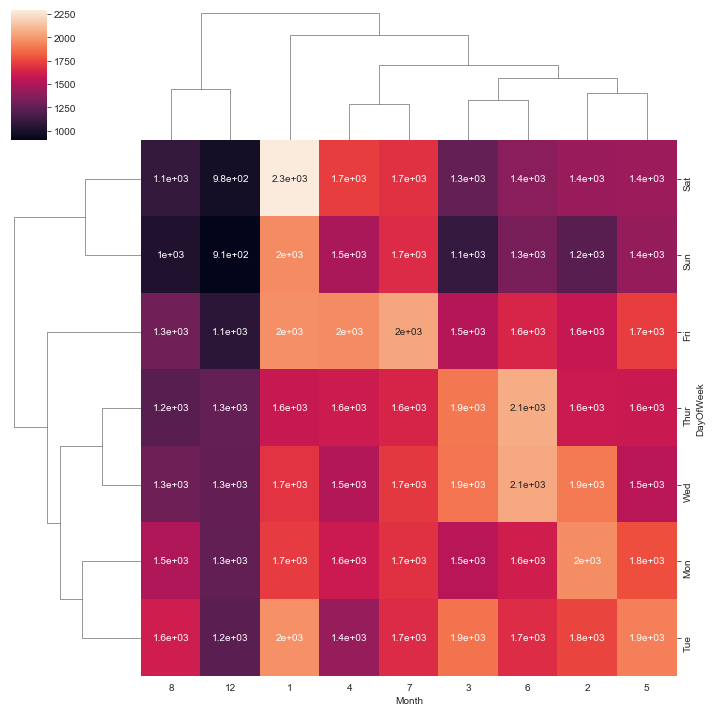

In [66]:
plt.figure(figsize=(10,6))
sns.clustermap(dayMonth, annot=True)
